# NumPy arrays

Nikolay Koldunov

koldunovn@gmail.com

================

<img  height="100" src="files/numpy.png" >

-    a powerful N-dimensional array object
-    sophisticated (broadcasting) functions
-    tools for integrating C/C++ and Fortran code
-    useful linear algebra, Fourier transform, and random number capabilities


In [1]:
import numpy as np
%matplotlib inline

In [2]:
np.set_printoptions(precision=3 , suppress= True) # this is just to make the output look better

## Load data

Load data in to a variable:

In [3]:
temp = np.loadtxt('Ham_3column.txt')

In [4]:
temp

array([[1891.,    1.,    1.,  -72.],
       [1891.,    1.,    2.,  -43.],
       [1891.,    1.,    3.,  -32.],
       ...,
       [2014.,    8.,   29.,  216.],
       [2014.,    8.,   30.,  198.],
       [2014.,    8.,   31.,  184.]])

In [5]:
temp.shape

(45168, 4)

<img  height="100" src="files/anatomyarray.png" >

In [6]:
temp.size

180672

So it's a *row-major* order. Matlab and Fortran use *column-major* order for arrays.

In [7]:
type(temp)

numpy.ndarray

Numpy arrays are statically typed, which allow faster operations

In [8]:
temp.dtype

dtype('float64')

You can't assign value of different type to element of the numpy array:

In [9]:
temp[0,0] = 'Year'

ValueError: could not convert string to float: 'Year'

Slicing works similarly to Matlab:

In [10]:
temp[0:5,:]

array([[1891.,    1.,    1.,  -72.],
       [1891.,    1.,    2.,  -43.],
       [1891.,    1.,    3.,  -32.],
       [1891.,    1.,    4.,   12.],
       [1891.,    1.,    5.,  -29.]])

In [11]:
temp[-5:-1,:]

array([[2014.,    8.,   27.,  219.],
       [2014.,    8.,   28.,  234.],
       [2014.,    8.,   29.,  216.],
       [2014.,    8.,   30.,  198.]])

One can look at the data. This is done by matplotlib module:

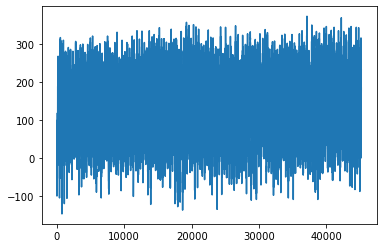

In [12]:
import matplotlib.pylab as plt
plt.plot(temp[:,3])

## Index slicing

In general it is similar to Matlab

First 12 elements of **second** column (months). Remember that indexing starts with 0:

In [13]:
temp[0:12,2]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

First raw:

In [14]:
temp[0,:]

array([1891.,    1.,    1.,  -72.])

## Exercise

 - Plot only first 1000 values
 - Plot last 1000 values


We can create mask, selecting all raws where values in third raw (days) equals 10:

In [15]:
mask = (temp[:,2]==10)

Here we apply this mask and show only first 5 raws of the array:

In [16]:
temp[mask][:20,:]

array([[1891.,    1.,   10.,  -89.],
       [1891.,    2.,   10.,  -19.],
       [1891.,    3.,   10.,   32.],
       [1891.,    4.,   10.,   84.],
       [1891.,    5.,   10.,  188.],
       [1891.,    6.,   10.,  130.],
       [1891.,    7.,   10.,  161.],
       [1891.,    8.,   10.,  171.],
       [1891.,    9.,   10.,  221.],
       [1891.,   10.,   10.,  181.],
       [1891.,   11.,   10.,   80.],
       [1891.,   12.,   10.,  107.],
       [1892.,    1.,   10.,   -4.],
       [1892.,    2.,   10.,   36.],
       [1892.,    3.,   10.,   16.],
       [1892.,    4.,   10.,  146.],
       [1892.,    5.,   10.,  195.],
       [1892.,    6.,   10.,  205.],
       [1892.,    7.,   10.,  209.],
       [1892.,    8.,   10.,  155.]])

You don't have to create separate variable for mask, but apply it directly. Here instead of first five rows I show five last rows:

In [17]:
temp[temp[:,2]==10][-5:,:]

array([[2014.,    4.,   10.,  116.],
       [2014.,    5.,   10.,   27.],
       [2014.,    6.,   10.,  300.],
       [2014.,    7.,   10.,  277.],
       [2014.,    8.,   10.,  259.]])

You can combine conditions. In this case we select days from 10 to 12 (only first 10 elements are shown):

In [18]:
temp[(temp[:,2]>=10)&(temp[:,2]<=12)][0:10,:]

array([[1891.,    1.,   10.,  -89.],
       [1891.,    1.,   11.,   16.],
       [1891.,    1.,   12.,   21.],
       [1891.,    2.,   10.,  -19.],
       [1891.,    2.,   11.,   36.],
       [1891.,    2.,   12.,   31.],
       [1891.,    3.,   10.,   32.],
       [1891.,    3.,   11.,   46.],
       [1891.,    3.,   12.,   46.],
       [1891.,    4.,   10.,   84.]])

## Exercise

    Select only summer months
    Select only first half of the year


## Basic operations

Create example array from first 12 values of second column and perform some basic operations:

In [19]:
days = temp[0:12,2]
days

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [20]:
days+10

array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.])

In [21]:
days*20

array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.,
       240.])

In [22]:
days*days

array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100., 121.,
       144.])

What's wrong with this figure?

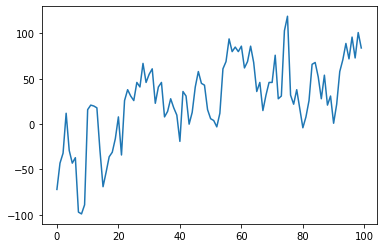

In [23]:
plt.plot(temp[:100,3])

## Exercise

- Create new array that will contain only temperatures

- Convert temperature to deg C

- Convert all temperatures to deg F


## Basic statistics

Create *temp_values* that will contain only data values:

In [24]:
temp_values = temp[:,3]/10.
temp_values

array([-7.2, -4.3, -3.2, ..., 21.6, 19.8, 18.4])

Simple statistics:

In [25]:
temp_values.min()

-14.6

In [26]:
temp_values.max()

37.3

In [27]:
temp_values.mean()

12.488779667020898

In [28]:
temp_values.std()

8.05358769929934

In [29]:
temp_values.sum()

564093.2

You can also use *sum* function:

In [30]:
np.sum(temp_values)

564093.2

One can make operations on the subsets:

## Exercise

    Calculate mean for first 1000 values of temperature


## Saving data

You can save your data as a text file

In [31]:
np.savetxt('temp_only_values.csv',temp[:, 3]/10., fmt='%.4f')

[Python formatting options](https://pyformat.info/)

Head of resulting file:

In [32]:
!head temp_only_values.csv

-7.2000
-4.3000
-3.2000
1.2000
-2.9000
-4.3000
-3.7000
-9.7000
-9.9000
-8.9000


You can also save it as binary:

In [33]:
f=open('temp_only_values.bin', 'w')
temp[:,3].tofile(f)
f.close()

## Exercises

* Select and plot only data for October
* Calculate monthly means for years from 1990 to 1999 and plot them